In [1]:
%matplotlib inline
from ecell4 import *
import numpy as np
import math
import matplotlib.pyplot as plt

run = 50

rm = 0.005
D = 1
Dt = 2*D
kd= 4.0*math.pi*D*4*rm
ka = 10*kd
kr = 0.1*ka
T = 160
L = 9
V1 = L**3
kon = (ka*kd)/(ka+kd)
taum = (2./3)*(rm**2)/D
N = 100#int(conc*V2)

with species_attributes():
     A |B|C| {'D': str(D), 'radius':str(rm)}

with reaction_rules():#for spa and egfrd
     A + B == C | (ka,kr)
        
m1 = get_model()

spa = np.array(ensemble_simulations(run, T, y0={"A": N,'B': N}, model=m1, solver=("spatiocyte", rm), volume=V1,return_type='array'))
ts = spa[0][:,0]
nas = np.mean(spa[:,:,1],axis=0)
filename = open('data/2ndorder_reversible_largervoxelsizeL=9oridata.csv','w')
np.savetxt(filename,np.column_stack((ts,nas)),delimiter=',',fmt='%s')
filename.close()


kr 0.251327412287 krn 0.0257499275955
[2.5132741228718345, 0.66134186480793322, 0.5422794891074012] [0.24292508354398931, 0.24291784528831506, 0.24291061790235166]
dtau 0.00165
ka 2.51327412287 ktm 0.257499275955 kt2 0.242903401359
kd 0.251327412287 ka 2.51327412287 kon 0.228479465716
vol fract % 0.0135591323702
kr 0.251327412287 krn 0.0252794346417
[2.5132741228718345, 0.59410586078373451, 0.49171511318063998] [0.24049916144653014, 0.24049313853050475, 0.24048712465943414]
dtau 0.00238333333333
ka 2.51327412287 ktm 0.252794346417 kt2 0.240481119811
kd 0.251327412287 ka 2.51327412287 kon 0.228479465716
vol fract % 0.0235569737381


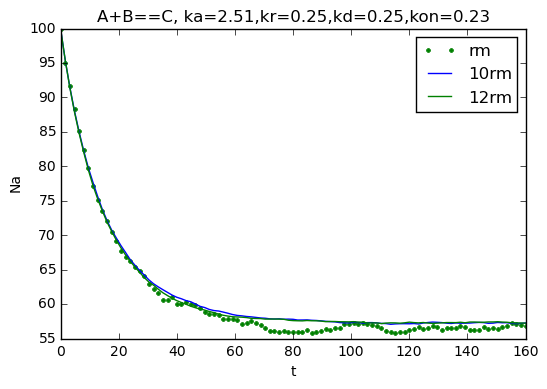

In [3]:
factors = [10,12]
plt.plot(ts,nas,'g.',label='rm')
for factor in factors:
    rv = factor*rm
    V2 =  spatiocyte.SpatiocyteWorld(ones()*L,rv).get_volume()
    tauv = (2./3)*(rv**2)/D
    dtau = tauv - taum
    phi = (100*2*N*4.*math.pi*(rv**3)/(3*V2)) 

    def phix(x):
        return 1./( (377.*x/324)+(1+ (314.*(x**2)/847) )**0.5)

    def kt(tau):
        tauc = ((ka*2*rm/(ka+kd))**2)/(2*Dt)
        x = ka*((tau/tauc)**(0.5))/kd
        return kon*(1+(ka*phix(x)/kd))

    kt2 = kt(dtau)
    dt = dtau/1000#fine resolution needed for produce accurate numerical integration
    kts = [kt(t-taum) for t in np.arange(taum,tauv,dt)]
    ktm = np.trapz(kts,dx=dt)/dtau
    kd2= 4.0*math.pi*D*4*rv
    krn = ktm*kr/ka#kr*(1+(ktm/kd2))/(1+(ka/kd))

    print 'kr',kr,'krn',krn
    print kts[:3],kts[-3:]
    print 'dtau',dtau
    print 'ka',ka,'ktm',ktm,'kt2',kt2
    print 'kd',kd,'ka', ka,'kon', kon
    print 'vol fract %',phi

    with species_attributes():
         A |B|C| {'D': str(D), 'radius':str(rm)}

    with reaction_rules():#for spa and egfrd
         A + B == C | (ktm,krn)

    m2 = get_model()

    spa2 = np.array(ensemble_simulations(int(factor)*2*run, T, y0={"A": N,'B': N}, model=m2, solver=("spatiocyte", rv), volume=V1,return_type='array'))
    ts2 = spa2[0][:,0]
    nas2 = np.mean(spa2[:,:,1],axis=0)
    plt.plot(ts2,nas2,label=str(factor)+'rm')

plt.ylabel('Na')
plt.xlabel('t')
plt.title('A+B==C, ka={0:0.2f},kr={1:0.2f},kd={2:0.2f},kon={3:0.2f}'.format(ka,kr,kd,kon,ktm,krn))
#plt.title('ka={0:0.2f},kr={1:0.2f},kd={2:0.2f},kon={3:0.2f},ktm={4:0.2f},krn={5:0.2f}'.format(ka,kr,kd,kon,ktm,krn))
plt.legend()
plt.savefig("figure/2ndodr_re_Difflim_larger_rv_with_modification_LV",format='png',dpi=100)

In [4]:
#filename = open('data/2ndorder_reversible_largervoxelsizeL=9oridata.csv','w')
#np.savetxt(filename,np.column_stack((ts2,nas2)),delimiter=',',fmt='%s')
#filename.close()

In [22]:
print 'kon',ka*kd/(ka+kd) 
print 'kon 2',ktm*kd2/(ktm+kd2)
print 'koff',kr/(1+(ka/kd))
print 'koff 2', krn/(1+(ktm/kd2))

kon 0.228479465716
kon 2 0.232924579503
koff 0.0228479465716
koff 2 0.0228479465716


In [ ]:
#print 'aceptance prob, Prm',ap(ka,rm),'Prv',ap(kt2,rv)
#print 'no of a',N
#print 'no of b',N

#print taum,tauv
#print 'L',L
#print 'rv',rv,'rm',rm
#print 'actual vol',V2
#print 'Ls',Ls

#calculate intrinsic rm'
#fa = (3.14*Dt*taum)**0.5
#a = 0.5* fa
#b = 0.5*(fa*fa + ka*fa/(3.14*Dt))**0.5
#sol1 = -a+b
#sol2 = -a-b
#rr1 = (kd+ka)*sol1/2./ka
#rr2 = (kd+ka)*sol2/2./ka
#rr = rr1
#print 'soltn',rr1,rr2,rm

#def kt3(tau):
#    tauc = ((ka*2*rr/(ka+kd))**2)/(2*Dt)
#   x = ka*((tau/tauc)**(0.5))/kd
#    return kon*(1+(ka*phix(x)/kd))

#print kt3(taum),ka

x [  0.          15.55634919  22.        ]
tau 4.13223140496e-07
phis [1.0, 0.036198485223472326, 0.025620571414851901]
dx 0.01
kt [0.025132741228718353, 0.022930652677197877, 0.022906484316244084]
st [1.0, 0.9764231301739725, 0.9544563552763042]


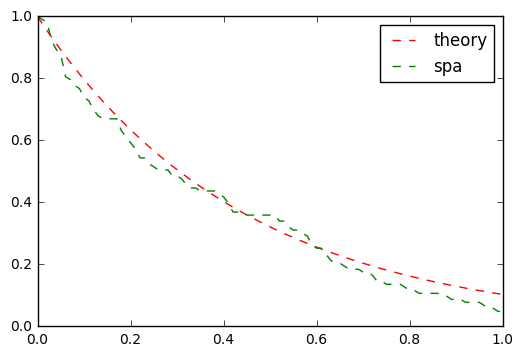

In [7]:
def phi(x):
    return [1./( (377.*xx/324)+(1+ (314.*(xx**2)/847) )**0.5) for xx in x]

def phi3(x):
    p = []
    l=len(x)
    for i in range(l):
        if (i==0):
            p.append(math.exp(x[i]**2)*math.erfc(x[i]))
        else:
            xi = 1./x[i]
            p.append((1./math.sqrt(math.pi))*xi*(1- 0.5*xi+0.75*xi**2-1.875*xi**3+6.5625*xi**4 -29.53125*xi**5))
    return p

def phi2(x):
    tt =1.0/(1.0+0.5*x) 
    phi = [t*math.exp(-1.26551223+t*(1.00002368+t*(0.37409196+t*(0.09678418+t*(-0.18628806+t*(0.27886807+t*(-1.13520398+t*(1.48851587+ t*(-0.82215223+t*0.17087277))))))))) for t in tt] 
    return phi

tau = ((ka*2*voxelr/(ka+kd))**2)/(2*D)
tt= ts#np.arange(0,ts[-1],1e-5)
x = ka*((tt/tau)**(0.5))/kd
print 'x',x[:3]
print 'tau',tau
phis = phi(x)
print 'phis',phis[:3]
#kt = [kon for phi in phis]
kt = [kon*(1+(ka*p/kd)) for p in phis]
st = []
dx = tt[2]-tt[1]
for i in range(len(tt)):
    st.append(math.exp(-(N/V2)*np.trapz(kt[0:i+1],dx=dx)))
print 'dx',dx
print 'kt',kt[:3]
print 'st',st[:3]
#plt.plot(tt,kt,'.')
plt.plot(tt,st,'r--',label='theory')
plt.plot(ts,nas/N,'g--',label='spa')
ax= plt.gca()
#ax.set_yscale("log")
plt.legend()